# Stack Exchange Data Science Popular Questions
Stack Exchange allows people to ask concrete questions in a broad range of categories.  It's not opinion based like Reddit, but more of a Q&A structured site.  If someone has a specific question in regards to the category site they are in, they can ask it and expect to hopefully get an educated response.

There are a lot of subsections to the Stack Exchange site.  For example there is Mathematics, Stack Overflow, Artificial Intelligence, Data Science, etc.  For the purpose of this project, we will focus on Data Science.  The Data Science site is ranked poorly in the measure of answered questions.  It will be interesting to research why this may be.

When exploring the site, we can filter questions based on multiple different metrics.  Such as tags and hot questions.  Since we're intersted in unanswered questions, we can filter based on unanswered and compare to hot questions or compare the tags being used.

In each post, especially in the Data Science area, there are very specific high level questions.  Mostly Machine Learning orientated.  Typically, the unanswered questions are pretty complex.  Machine Learning is an up and coming industry.  It is however a challenging, constantly expanding, and very math forward field.  Some of the questions may be above the knowledge of most of the users, hence being unanswered.

# Stack Exchange Data Query
Given that we are interested in popular questions and which tags relate to them, this will be a great place to explore further.  Luckily the Stack Exchange website has a [public data base](https://data.stackexchange.com/datascience/query/edit/1361163) that allows us to run SQL queries to gather the data.  We can then download the 'csv' file and import it in to a Pandas DataFrame.

As we look at the public database, we can see on the right is the Database Schema where we can decide what we want to query to.  Right now, we want to pull the data of the major categories that we're intersted from the Posts table.  That would be Id, PostTypeId, CreationDate, Score, ViewCount, Tags, AnswerCount, and FavoriteCount.  To do so, we'd run the query in the window:  
![stack_exchange](stack_exchange.png)



# Importing the Data
Now that we have the csv file of the data we're interested in.  We can import it and read it into a Pandas Dataframe.  We'll want to be able to filter on creation dates, so we'll make sure we specify that the 'CreationDate' column are in date format.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#read in and display the first five rows to become familiarized
questions = pd.read_csv('2019_questions.csv', parse_dates = ['CreationDate'])
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [3]:
#See the value types for each column
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [4]:
#the info showed us that FavoriteCount did not have 8839 non-null values, let's explore further.
questions.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

It seems like there are a ton of FavoriteCount NaN values.  This can easily be fixed by replacing the NaN values with 0 since all it means is the post was not favorited.  

When we looked at the first 5 rows of data above, the Tag section was pretty messy looking.  

For example, the first row had the tags as following:  ![tags](tags.png)  

For us to be able to aggregate on the tags, we need to convert them into list format.  

That row should instead look like the following: <code>[machine-learning, data-mining]</code>.

# Clean the data
Now we can fill the 'FavoriteCount' with zeros and convert the tag column into list format

In [5]:
#fill with 0's
questions['FavoriteCount'] = questions['FavoriteCount'].fillna(0).astype(int)

In [6]:
#split the values into a list
questions['Tags'] = questions['Tags'].str.replace("^<|>$", "").str.split("><")

In [7]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


# Counting the tags
Now that we have the tags separated, we can begin counting and discovering the most used and most viewed tags.  We'll start by creating a dictionary of each tag and the count.  We can then convert it back to a pandas DataFrame for ease of use.

In [8]:
#Dictionary of the Tags
tag_dict = {}
for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_dict:
            tag_dict[tag] += 1
        else:
            tag_dict[tag] = 1

In [9]:
#Convert the dictionary to a DataFrame
tag_count = pd.DataFrame.from_dict(tag_dict, orient="index")
#rename the column 0 to Count and visualize
tag_count.rename(columns={0:"Count"}, inplace=True)
tag_count.head(10)

,Count
machine-learning,2693
data-mining,217
regression,347
linear-regression,175
regularization,50
python,1814
time-series,466
forecast,34
forecasting,85
scikit-learn,540


In [10]:
#Sort the values and choose the Top 25 for our analysis
most_used_tags = tag_count.sort_values(by="Count", ascending=False).head(25)
most_used_tags

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


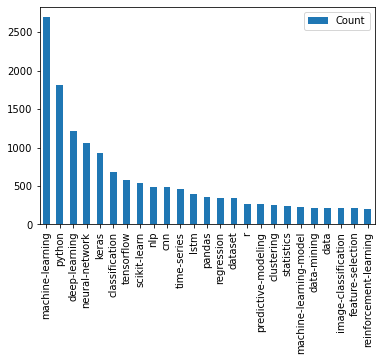

In [11]:
most_used_tags.plot.bar()

It seems that Machine Learning is by far the most used Tag.  We can see that the top 10 are all actually related to the Machine Learning field.  This includes Python, however Python is more broadly used for other reasons.

# Counting the views
Now that we have all the tags counted and organized, it makes sense to count each time a certain tag was viewed.  We can accomplish this by iterating over each row and creating a dictionary for the views of each tag.

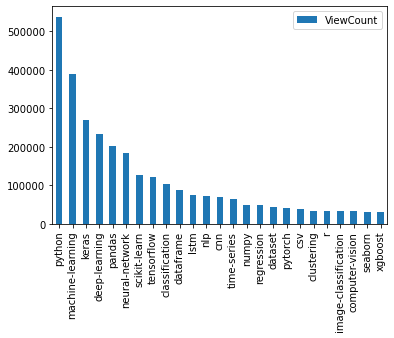

In [12]:
#create the dictionary and iterate over each row counting overall views
tag_view_count_dict = {}
for index,row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count_dict:
            tag_view_count_dict[tag] += row['ViewCount']
        else:
            tag_view_count_dict[tag] = row['ViewCount']
#Read into a Pandas Dataframe and rename the columns
tag_view_count = pd.DataFrame.from_dict(tag_view_count_dict, orient = "index")
tag_view_count.rename(columns = {0 : "ViewCount"}, inplace=True)
#Sort the top 25
most_viewed = tag_view_count.sort_values(by="ViewCount", ascending = False).head(25)
most_viewed.plot.bar()

# Comparing the Tag Count to View Count
Now that we have both, let's view the graphs together.  We can do this by creating subplots with 2 axes.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12930c640>],
      dtype=object)

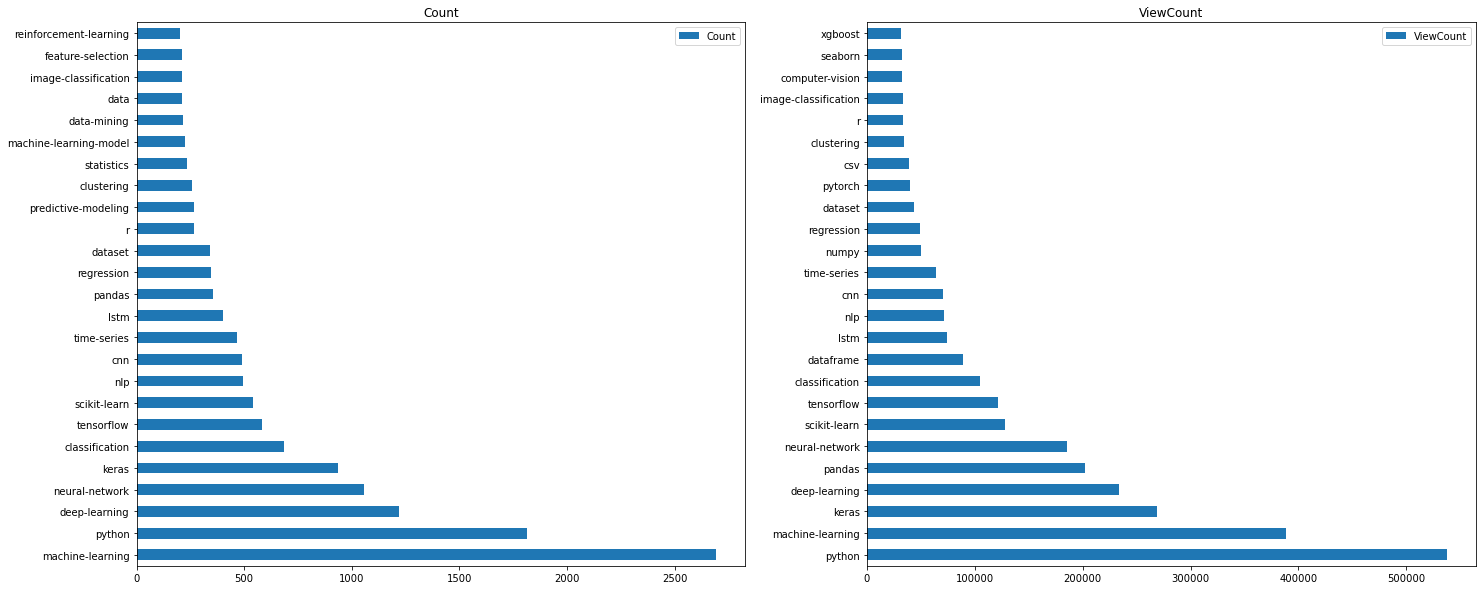

In [13]:
#Create the figure and plot it
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches((24,10))
most_used_tags.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

# Merge the datasets
Now that we have both datasets of Tag count and View Count.  We can merge them together to help analyze further.  Since there are a few different ways to merge the data, we can experiment with them to make sure we don't lose important data when merging.

# Left merge on most used tags
We can start with a left merge on the most used tags.  This will leave us with some possible NaN values in view count if the tag was not in the top 25 viewed

In [14]:
taginfo_from_most_used = pd.merge(left = most_used_tags, right = most_viewed, how = "left", left_index = True, right_index=True)
taginfo_from_most_used

,Count,ViewCount
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,71382.0
cnn,489,70349.0


# Right merge on most viewed tags
We can do the same as above, but now on most viewed instead.

In [15]:
taginfo_from_most_viewed = pd.merge(left = most_used_tags, right = most_viewed, how = "right", left_index = True, right_index=True)
taginfo_from_most_viewed

,Count,ViewCount
python,1814.0,537585
machine-learning,2693.0,388499
keras,935.0,268608
deep-learning,1220.0,233628
pandas,354.0,201787
neural-network,1055.0,185367
scikit-learn,540.0,128110
tensorflow,584.0,121369
classification,685.0,104457
dataframe,NaN,89352


# Outer join
If we use an outer join, it will keep all rows from both datasets.  This however leaves us with a lot of NaN values in both columns.

In [16]:
tag_info_outer_join = pd.merge(left = most_used_tags, right = most_viewed, how = "outer", left_index = True, right_index=True)
tag_info_outer_join.sort_values(by='Count')

,Count,ViewCount
reinforcement-learning,203.0,NaN
feature-selection,209.0,NaN
image-classification,211.0,33238.0
data,213.0,NaN
data-mining,217.0,NaN
machine-learning-model,224.0,NaN
statistics,234.0,NaN
clustering,257.0,33928.0
predictive-modeling,265.0,NaN
r,268.0,33684.0


# Sorting through the tags
As we gathered from looking at the graphs before of the tag count, we discovered that Machine Learning related content was the most used.  If we compare those to most viewed, the same holds true.

In [17]:
taginfo_from_most_used.sort_values(by="Count", ascending=False).head(10)

,Count,ViewCount
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,71382.0
cnn,489,70349.0


Since both counts focus on Machine Learning, Python, and Python libraries we can explore some of these libraries further to understand the relevancy and staying power in the Stack Exchange top questions.  It will help us decide the best topics to post in and help Data Science get more answered questions.

# Unanswered questions
Before we dive into specific tags, we should quickly look at the difference between answered and unanswered questions.  We can take a look at this by creating another dictionary for answer count based on tags.

In [33]:
tag_answer_count_dict = {}
for index,row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_answer_count_dict:
            tag_answer_count_dict[tag] += row['AnswerCount']
        else:
            tag_answer_count_dict[tag] = row['AnswerCount']
answer_count = pd.DataFrame.from_dict(tag_answer_count_dict, orient = "index")
answer_count.rename(columns = {0 : "AnswerCount"}, inplace=True)
answer_count.sort_values(by = 'AnswerCount',ascending=False).head(10)

,AnswerCount
machine-learning,2313
python,1507
deep-learning,877
neural-network,824
keras,654
classification,651
scikit-learn,518
pandas,394
nlp,369
cnn,362


We can see that the most answer questions, matches pretty nicely with the most used tags and most viewed.  It is all machine learning and python related.

Conversely if we look at the bottom say 25, we can see that the tags don't make much sense nor are they popular.

In [34]:
answer_count.sort_values(by = 'AnswerCount',ascending=False).tail(25)

,AnswerCount
lbp,0
cause-effect-relations,0
doc2vec,0
impala,0
relational-dbms,0
objective-function,0
dump,0
wikipedia,0
refit-model,0
libsvm,0


# Tags relevancy and staying power
Looking at the top 10 tags used for all posts, we see that not only is there a <code>deep-learning</code> tag, but there are multiple tags that relate with deep learning.  

These include <code>"lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"</code>.

What we're interested in is whether deep learning just a temporary fad or is it here to stay.  We can dive into this further by revisting the stack exchange database and running another query that gathers just Id, CreationDate, and Tags.  This way we can see the popularity of deep learning related tags over time.  

We would run the following code to gather the data we need:

<code>SELECT 
    Id, 
    CreationDate, 
    Tags
FROM posts
WHERE PostTypeId = 1</code>
    

# Import and read in the new data
Now that we have another dataset, we can read it in and begin our analysis.  We'll have to clean the Tag column again.

In [18]:
all_questions = pd.read_csv('all_questions.csv', parse_dates = ['CreationDate'])
all_questions['Tags'] = all_questions['Tags'].str.replace("^<|>$","").str.split("><")
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


# Tracking the deep learning tags
Since we're interested in the deep learning tags, we can apply a function that creates a new column that signifies whether or not there are deep learning tags associated with the post.

In [19]:
def deep_learning_class(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]:
            return 1
    return 0
all_questions['DeepLearning'] = all_questions['Tags'].apply(deep_learning_class)
all_questions.sample(5)

,Id,CreationDate,Tags,DeepLearning
5846,5602,2015-04-24 14:50:51,"[classification, python]",0
11517,61408,2019-10-08 04:13:37,"[pandas, methods]",0
17493,11893,2016-05-23 20:33:17,"[python, time-series, anomaly-detection, seque...",0
17989,54192,2019-06-21 04:24:52,"[machine-learning, neural-network, deep-learni...",1
5242,26733,2018-01-17 08:30:33,"[python, nlp, scikit-learn, text-mining]",1


# Watching for trends
Trends typically wax and wane overtime.  Rather than looking weekly or monthly, we can apply a function to the dates and categorize by quarter.

When we gathered this data, 2020 wasn't finished yet, so we should filter on any date before 2020 to have full years of data.

In [20]:
#Filter for before 2020
all_questions = all_questions[all_questions['CreationDate'].dt.year < 2020]

#Create the function to label a certain date as the corresponding quarter
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)
#Apply the function and check to see if the column looks good
all_questions['Quarter'] = all_questions['CreationDate'].apply(fetch_quarter)
all_questions.sample(10)

,Id,CreationDate,Tags,DeepLearning,Quarter
1027,24760,2017-11-15 11:17:32,"[algorithms, anomaly-detection, outlier, termi...",0,17Q4
4289,57226,2019-08-08 11:53:43,"[python, visualization, matplotlib]",0,19Q3
7586,27856,2018-02-15 09:01:47,"[machine-learning, gradient-descent, mini-batc...",0,18Q1
2814,38267,2018-09-14 17:12:06,"[machine-learning, python, scikit-learn, pandas]",1,18Q3
21374,36480,2018-08-04 19:58:15,"[machine-learning, cnn, mnist]",1,18Q3
14621,10558,2016-03-06 18:33:58,"[nlp, language-model]",0,16Q1
6628,58284,2019-08-27 19:01:08,"[machine-learning, classification, loss-function]",0,19Q3
15270,23002,2017-09-13 15:38:39,"[classification, unbalanced-classes, sequence]",0,17Q3
17189,32233,2018-05-27 22:29:23,"[machine-learning, python, perceptron]",0,18Q2
18316,54400,2019-06-24 15:30:27,"[r, ensemble-modeling]",0,19Q2


# Grouping by quarter
Now that we have a column for quarters, we can group based on each quarter.  We're interested in the the total amount of questions about deep learning and the overall quantity of questions, regardless of topic.

In [21]:
#Aggregate the data on the sum of deep learning questions and the total amount of questions asked.
quarterly = all_questions.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})

#Rename the columns for readability
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']

#Display the new dataset
quarterly

,DeepLearningQuestions,TotalQuestions
Quarter,,
14Q2,9,157
14Q3,13,189
14Q4,21,216
15Q1,18,190
15Q2,28,284
15Q3,45,311
15Q4,66,382
16Q1,110,516
16Q2,109,518


We're interested in the ratio of deep learning questions to total questions.  We can create a new column that calculates this so we can visualize the growth of the deep learning topic

In [22]:
#Create the new column for the ratio and display
quarterly['DeepLearningRate'] = quarterly['DeepLearningQuestions'] / quarterly['TotalQuestions']

#Reset the index so we can visualize with a bar plot
quarterly.reset_index(inplace=True)

#See the dataset
quarterly

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
0,14Q2,9,157,0.057325
1,14Q3,13,189,0.068783
2,14Q4,21,216,0.097222
3,15Q1,18,190,0.094737
4,15Q2,28,284,0.098592
5,15Q3,45,311,0.144695
6,15Q4,66,382,0.172775
7,16Q1,110,516,0.213178
8,16Q2,109,518,0.210425
9,16Q3,161,585,0.275214


# Visualize the deep learning topic
Now that we have the data, we can visualize it by having a bar plot overlayed with the deep learning rate.

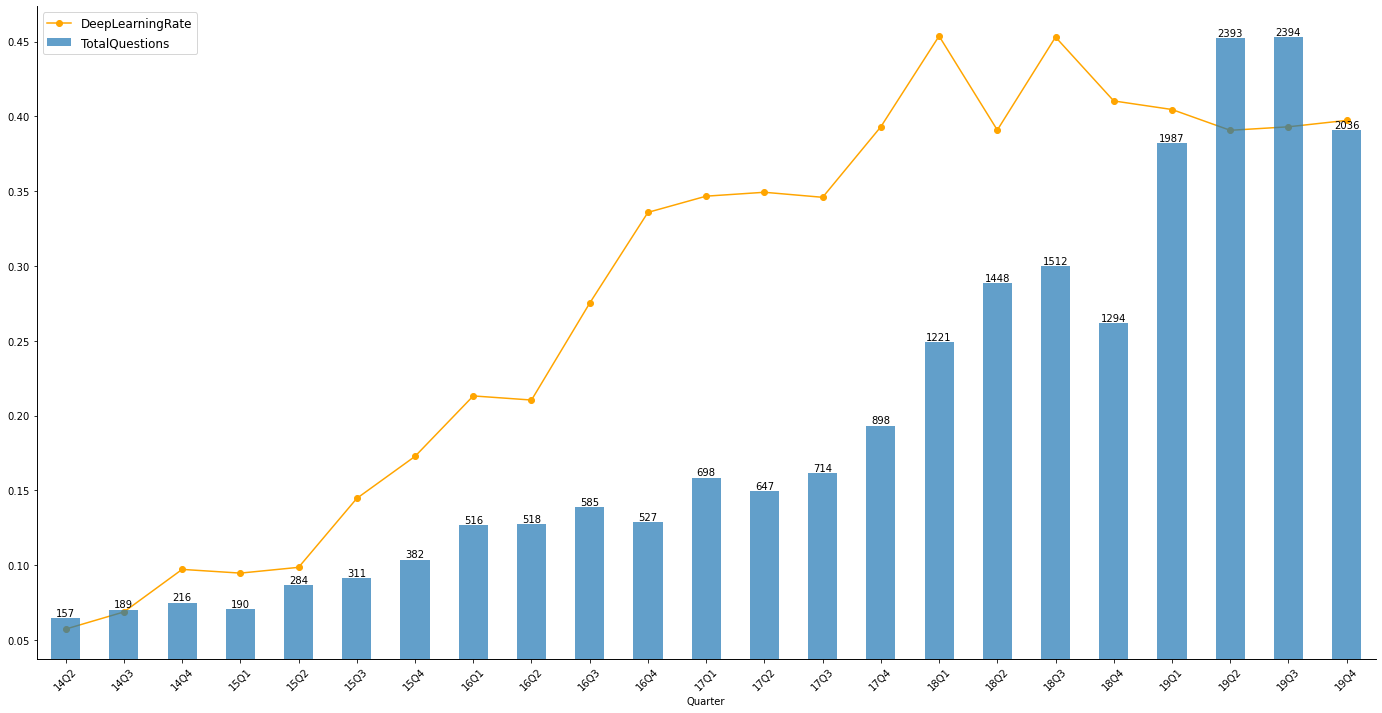

In [23]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

As we look at the trend of deep learning over time, it seems that deep learning has been spiking up with interest, but it looks to be plateauing.  However, there is no indication that interest is dropping off, so this remains a solid area to continue to post in.  Since this is a popular category, the likelihood of getting a question answered remains higher.  This can improve the popularity of the Data Science Stack Exchange site. 

# Other popular content
Machine Learning, and specifically deep learning, may be extremely popular, but this is a very specialized field.  When it comes to data science, not everyone will be implementing deep learning into projects.  Let's take another look at most viewed tags.

In [41]:
other_popular = pd.merge(left = taginfo_from_most_used, right = answer_count, how = "left", left_index = True, right_index=True)
other_popular.sort_values(by="ViewCount", ascending=False).head(10)

,Count,ViewCount,AnswerCount
python,1814,537585.0,1507
machine-learning,2693,388499.0,2313
keras,935,268608.0,654
deep-learning,1220,233628.0,877
pandas,354,201787.0,394
neural-network,1055,185367.0,824
scikit-learn,540,128110.0,518
tensorflow,584,121369.0,353
classification,685,104457.0,651
lstm,402,74458.0,244


We can see that that although there aren't as many posts, the view count for Pandas is in the top 5.  Pandas are extremely important for data science since it's the number one way to look at and manipulate data sets.  This may be an excellent topic to post in as it is a simpler topic and seems to be very popular.  

We can also see that pandas receives a lot of answers in relation to total questions asked.

# Conclusion
In diving deeper into the typical tags being used in the Data Science Stack Exchange site, we've learned that anything to do with Python, Machine Learning, and even Pandas are the most popular and most answered questions.  If we want to increase the overall popularity of the Data Science site, we should have people focus on these types of questions.  The unanswered questions didn't really seem to match any relevant category that directly represents Data Science.  Since the people that use this site are going to be focusing on the most relevant Data Science categories, sticking to these topics will increase the likelihood of receiving an answer.  This in turn, will increase the answer rate and overall popularity of the site.